Arnoldi's Method

$Q_m = [q_1, ..., q_m]$

$A Q_m = A_m H_m + reszta$

$q_1 := x_0 / ||x_0||_2$

$/alpha_1=/\; h_{1,1} := q_1^T A q_1$

$s = A q_1 - h_{1,1} q_1$

$/beta_1=/\; h_{2,1} = ||s||_2$

$q_2 = s / h_{2,1}$

for j = 2:m
    h_{i,j} = q_i^T A q_i    <---- i = 1..j
    /beta_j = h_{j-1,j} = q_{j-1}^T A q_j/
    s = A q_j - \sum_{i=1}^{j} h_{i,j} q_i
    /alpha_i = h_{j,j} = q_j^T A q_j/
    h_{j+1,j} = ||s||_2
    q_{j+1} = s / h_{j+1,j}


Algorytm Lanczosa

q_1 = x_0 / ||x_0||_2
beta_0 = 0
for j = 1:m
    w = A q_j
    alpha_j = q_j^T w
    s = w - alpha_j q_j - beta_j q_{j-1}
    b_{j+1} = ||s||_2
    q_{j+1} = s / beta_{j+1}

Plan na dziś:
- losowa A = A^T
- Lanczos m kroków i
- Wypisujemy wartości własne T_m (uporządkowane)

In [15]:
import numpy as np
# Make random matrix A such that A = A^T
N = 12
_B = np.random.randn(N, N)
A = (_B + _B.T) / 2
print(A)

[[-0.15188508 -0.8800751   0.29948968 ...  0.92902227 -2.18561973
   0.34544558]
 [-0.8800751   0.35625513 -0.26490201 ... -0.65429903 -0.08519778
  -1.34448643]
 [ 0.29948968 -0.26490201 -1.08729338 ... -0.01562792 -0.77357593
  -0.03615866]
 ...
 [ 0.92902227 -0.65429903 -0.01562792 ...  0.04115471 -0.34021577
   0.24737903]
 [-2.18561973 -0.08519778 -0.77357593 ... -0.34021577  1.34615205
  -1.1002674 ]
 [ 0.34544558 -1.34448643 -0.03615866 ...  0.24737903 -1.1002674
  -1.3110021 ]]


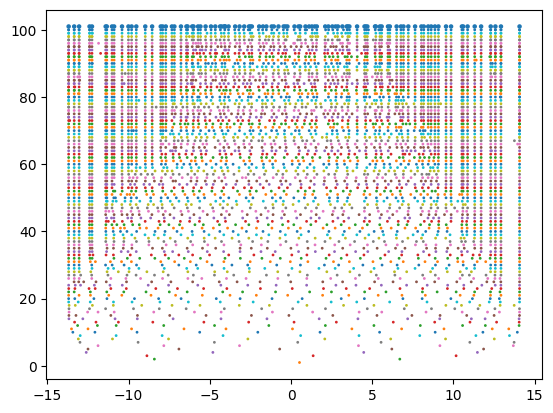

In [17]:
def go(A, m):

    def lanczos_algorithm(A, m):
        (n, _n) = np.shape(A)
        assert n == _n
        q = np.zeros((m, n))
        a = np.zeros(m)
        b = np.zeros(m)
        x_0 = np.random.randn(n)
        q[0] = (x_0 / np.linalg.norm(x_0))
        for j in range(m):
            w = A @ q[j]
            a[j] = (q[j].T @ w)
            s = w - a[j] * q[j] - b[j-1] * q[j - 1]
            b[j] = (np.linalg.norm(s))
            if j + 1 < m:
                q[j + 1] = (s / b[j])
        return a, b, q

    eigenvalues = np.linalg.eig(A)[0]
    eigenvalues_sorted = sorted(eigenvalues)

    a, b, q = lanczos_algorithm(A, m)

    def make_tm(a, b, m):
        matrix = np.zeros((m, m))
        for i in range(m):
            matrix[i, i] = a[i]
            if i + 1 < m:
                matrix[i, i + 1] = b[i]
                matrix[i + 1, i] = b[i]
        return matrix


    t_m = make_tm(a, b, m)
    t_m_eigenvalues = np.linalg.eig(t_m)[0]
    t_m_eigenvalues_sorted = sorted(t_m_eigenvalues)

    assert np.linalg.norm(q @ q.T - np.identity(m)) < 1e-10

    return eigenvalues_sorted, t_m_eigenvalues_sorted


eigen, aprox_eigen = go(A, 4)

